# RNN for sentimental analysis

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from tensorflow.strings import regex_replace
from tensorflow import keras
from tensorflow.keras.utils import text_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

In [2]:
def prepareData(dir):
  data = text_dataset_from_directory(dir)
  return data.map(
    lambda text, label: (regex_replace(text, '<br />', ' '), label),
  )

train_data = prepareData("../datasets/imdb-movie-review/train")
validation_data = prepareData("../datasets/imdb-movie-review/test")

Found 25000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


## checking the data

In [3]:
for text_batch, label_batch in train_data.take(1):
  print(text_batch.numpy()[0])
  print(label_batch.numpy()[0]) # 0 = negative, 1 = positive

b"I have seen a couple movies on eating disorders but this one was definitely my favorite one. The problem with the other ones was that the people with the eating disorders towards the end just automatically get better or accept the fact that they need help and thats it. this movie I thought was more realistic cause in this one the main character Lexi doesn't automatically just get better. She gets better and then has a drawback. I think this movie shows more than the others that I've seen that getting better doesn't just happen, it's hard work and takes time, it's a long path to recovery. I think this movie shows all of that very well. There should be more movies like this."
1


## defining model

In [4]:
train_texts = train_data.map(lambda text, label: text)

max_tokens = 1000
max_len = 100
vectorize_layer = TextVectorization(max_tokens=max_tokens, output_mode="int", output_sequence_length=max_len)
vectorize_layer.adapt(train_texts)

In [5]:
def make_model():
    model = Sequential()

    model.add(Input(shape=(1,), dtype="string"))
    model.add(vectorize_layer)
    model.add(Embedding(max_tokens + 1, 128))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64, dropout=0.25, recurrent_dropout=0.25))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    return model

In [6]:
model = make_model()

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

## Training

In [7]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
782/782 [==============================] - 263s 319ms/step - loss: 0.5417 - accuracy: 0.7264 - val_loss: 0.4960 - val_accuracy: 0.7739
Epoch 2/5
782/782 [==============================] - 229s 293ms/step - loss: 0.4541 - accuracy: 0.7959 - val_loss: 0.4439 - val_accuracy: 0.7928
Epoch 3/5
782/782 [==============================] - 241s 308ms/step - loss: 0.4205 - accuracy: 0.8116 - val_loss: 0.4500 - val_accuracy: 0.7949
Epoch 4/5
782/782 [==============================] - 239s 305ms/step - loss: 0.3989 - accuracy: 0.8232 - val_loss: 0.4967 - val_accuracy: 0.7892
Epoch 5/5
782/782 [==============================] - 225s 287ms/step - loss: 0.3783 - accuracy: 0.8335 - val_loss: 0.5133 - val_accuracy: 0.7693


## Output training results

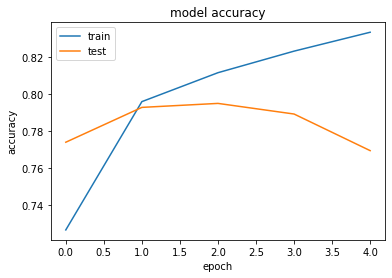

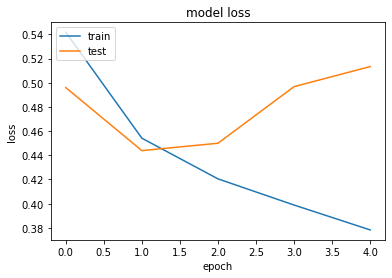

In [9]:
keras.utils.plot_model(model, to_file='output_model/model.png', show_shapes=True)

def print_hsitory(history):

    plot1 = plt.figure(1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plot1 = plt.figure(2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

print_hsitory(history)